In [23]:

# Import all libraries needed 
import pandas as pd # data processing, CSV file - Dataframe
import numpy as np # linear algebra - Arraies
import matplotlib.pyplot as plt # plotting - Visualization 
import seaborn as sns # Visualization 
from datetime import datetime
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




In [2]:
cve = pd.read_csv('cve.csv') #read data 

In [3]:
cve.head() # Shows the first 5 rows of data

,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,2019-11-20 20:15:00,2019-11-20 20:15:00,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cve.info() # explain data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89660 entries, 0 to 89659
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              89660 non-null  object 
 1   mod_date                89660 non-null  object 
 2   pub_date                89660 non-null  object 
 3   cvss                    89660 non-null  float64
 4   cwe_code                89660 non-null  int64  
 5   cwe_name                89660 non-null  object 
 6   summary                 89660 non-null  object 
 7   access_authentication   88776 non-null  object 
 8   access_complexity       88776 non-null  object 
 9   access_vector           88776 non-null  object 
 10  impact_availability     88776 non-null  object 
 11  impact_confidentiality  88776 non-null  object 
 12  impact_integrity        88776 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.9+ MB


In [5]:
cve.dtypes #check type

Unnamed: 0                 object
mod_date                   object
pub_date                   object
cvss                      float64
cwe_code                    int64
cwe_name                   object
summary                    object
access_authentication      object
access_complexity          object
access_vector              object
impact_availability        object
impact_confidentiality     object
impact_integrity           object
dtype: object

In [6]:
# Check Duplicates
cve.duplicated().sum()

0

In [7]:
cve.describe() #Get statistical data 

,cvss,cwe_code
count,89660.000000,89660.000000
mean,6.021429,199.690854
std,1.994757,176.177244
min,0.000000,1.000000
25%,4.300000,79.000000
50%,5.800000,119.000000
75%,7.500000,284.000000
max,10.000000,1188.000000


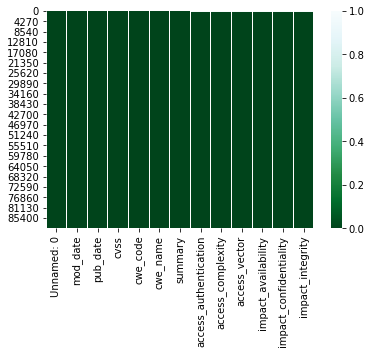

In [9]:
sns.heatmap(cve.isnull(), cmap="BuGn_r")
plt.show() #see null vlaue

In [10]:
cve.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 

In [11]:
obj_types = ['access_authentication', 'access_complexity', 'access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']

In [12]:
#s=pd.get_dummies(obj_types)

In [13]:
#s.head()

In [14]:
def transform_to_int(train, obj_types):
    #Assign dictionaries with current values and replacements for each column
    d_aa = {'NONE':0, 'SINGLE':1, 'MULTIPLE':2}
    d_ac = {'LOW':0, 'MEDIUM':1, 'HIGH':2}
    d_av = {'LOCAL':0, 'NETWORK':1, 'ADJACENT_NETWORK':2}
    d_ia = {'NONE':0, 'PARTIAL':1, 'COMPLETE':2}
    d_ic = {'NONE':0, 'PARTIAL':1, 'COMPLETE':2}
    d_ii = {'NONE':0, 'PARTIAL':1, 'COMPLETE':2}
    #Each positional index in replacements corresponds to the column in obj_types
    replacements = [d_aa, d_ac, d_av, d_ia, d_ic, d_ii]

    #Replace using lambda Series.map(lambda)
    for i,col in enumerate(obj_types):
        train[col] = train[col].map(lambda a: replacements[i][a]).astype('int64')

In [15]:
transform_to_int(cve, obj_types)

In [16]:
cve.head()

,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
138,CVE-2019-2211,2019-11-14 21:36:00,2019-11-13 18:15:00,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,0,0,1,0,2,0
139,CVE-2019-2212,2019-11-14 21:30:00,2019-11-13 18:15:00,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",0,0,0,0,2,0
140,CVE-2019-2213,2019-11-14 21:24:00,2019-11-13 18:15:00,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",0,1,0,2,2,2
149,CVE-2019-2214,2019-11-14 21:19:00,2019-11-13 18:15:00,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",0,0,0,2,2,2
150,CVE-2019-18793,2019-11-14 21:14:00,2019-11-13 20:15:00,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,0,1,1,0,0,1


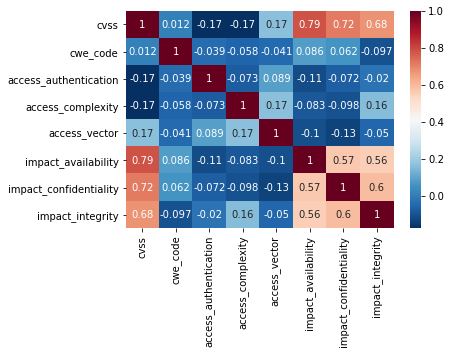

In [17]:
correlation_matrix = cve.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r")
plt.show()

Interestingly there seems to be a relatively strong correlation between the cvss and the impact on the availability, confidentiality or integrity,which was also to be expected.

In [19]:
feature = cve['cvss']
target = cve['impact_availability']

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)
X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)

In [22]:
LR =LogisticRegression(random_state=100)
LR.fit(X_train,Y_train)
prediction = LR.predict(X_train)

print(f"Accuracy score is {accuracy_score(Y_train, prediction):.2f}")
print(classification_report(Y_train, prediction))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, prediction))


Accuracy score is 0.78
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     25924
           1       0.77      0.71      0.74     28876
           2       0.98      0.67      0.80     16220

    accuracy                           0.78     71020
   macro avg       0.82      0.77      0.78     71020
weighted avg       0.80      0.78      0.78     71020

[[24150  1526   248]
 [ 8385 20466    25]
 [  629  4677 10914]]


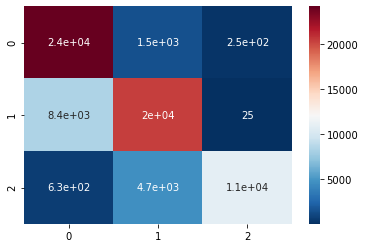

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 
 
# load the tips dataset
dataset = confusion_matrix(Y_train, prediction)
sns.heatmap(dataset, annot = True,
          cmap="RdBu_r")
plt.show()

In [ ]:
feature = cve['cvss']
target = cve['impact_confidentiality']

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)
X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)

In [24]:
LR =LogisticRegression(random_state=100)
LR.fit(X_train,Y_train)
prediction = LR.predict(X_train)

print(f"Accuracy score is {accuracy_score(Y_train, prediction):.2f}")
print(classification_report(Y_train, prediction))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, prediction))


Accuracy score is 0.78
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     25924
           1       0.77      0.71      0.74     28876
           2       0.98      0.67      0.80     16220

    accuracy                           0.78     71020
   macro avg       0.82      0.77      0.78     71020
weighted avg       0.80      0.78      0.78     71020

[[24150  1526   248]
 [ 8385 20466    25]
 [  629  4677 10914]]


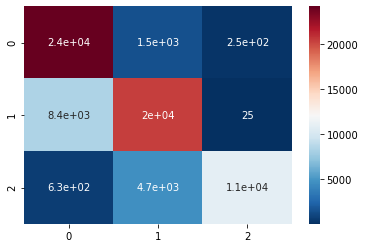

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 
 
# load the tips dataset
dataset = confusion_matrix(Y_train, prediction)
sns.heatmap(dataset, annot = True,
          cmap="RdBu_r")
plt.show()

In [26]:
feature = cve['cvss']
target = cve['impact_integrity']

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)
X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)

In [27]:
LR =LogisticRegression(random_state=100)
LR.fit(X_train,Y_train)
prediction = LR.predict(X_train)

print(f"Accuracy score is {accuracy_score(Y_train, prediction):.2f}")
print(classification_report(Y_train, prediction))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, prediction))


Accuracy score is 0.67
              precision    recall  f1-score   support

           0       0.55      0.22      0.32     20469
           1       0.63      0.90      0.74     37083
           2       0.99      0.72      0.83     13468

    accuracy                           0.67     71020
   macro avg       0.72      0.61      0.63     71020
weighted avg       0.67      0.67      0.63     71020

[[ 4599 15839    31]
 [ 3775 33210    98]
 [    1  3823  9644]]


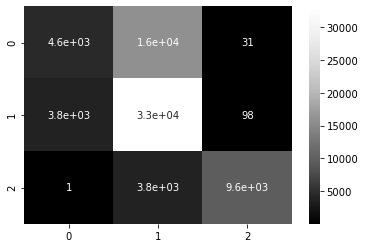

In [29]:
# load the tips dataset
dataset = confusion_matrix(Y_train, prediction)
sns.heatmap(dataset, annot = True,
          cmap="Greys_r")
plt.show()

conclusion: 
Interestingly there seems to be a relatively strong correlation between the cvss and the impact on the availability, confidentiality or integrity (in this order)